In [231]:
# Import Packages
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt 

In [232]:
# 学習回数
epochs=100
# 中間層ユニット数
num_hidden = 3

# データ生成
x = np.arange(-10, 10, 0.1) 
# input_data = (x - x.min()) / (x.max() - x.min())
input_data = x  / x.max()
# input_data = (x - x.mean()) / x.std()
training_data = 4 * input_data ** 3 - 2 * input_data
# training_data = (y - y.min()) / (y.max() - y.min())
# print(x)
# print(input_data)

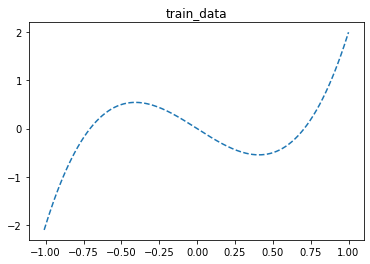

In [233]:
# 教師データグラフ出力
plt.title('train_data')
plt.plot(input_data, training_data, linestyle="dashed")
plt.savefig('images/train_data.png')
plt.show()

In [234]:
# モデル生成
model = keras.Sequential(
    [   
        layers.InputLayer(input_shape=(1,)),
        layers.Dense(num_hidden, activation="sigmoid"),
        layers.Dense(1, activation="linear")
    ]
)
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [235]:
# 学習方法
model.compile(
    loss='mse', # 誤差関数、平均二乗誤差
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # 確率的勾配降下法
    metrics='mse' # 評価関数、平均二乗誤差
)

In [236]:
# 学習
print("Fit model on training data")
history = model.fit(
    input_data,
    training_data,
    batch_size=1,
    epochs=epochs,
    # validation_data = (input_data,training_data)
)
# history.history

Fit model on training data
Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 0.5778 - mse: 0.5778
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5491 - mse: 0.5491
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4062 - mse: 0.4062
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4532 - mse: 0.4532
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4542 - mse: 0.4542
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4642 - mse: 0.4642
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4134 - mse: 0.4134
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4288 - mse: 0.4288
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5140 - mse: 0.5140
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4808 - mse: 0.4808
Epoch 11/100

In [237]:
# 検証
print("Evaluate on test data")
results = model.predict(input_data)
# print("test loss, test acc:", results)

Evaluate on test data


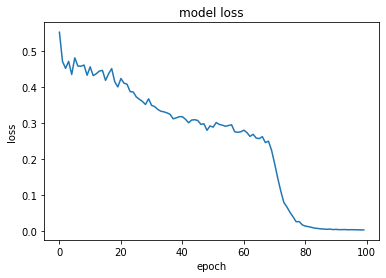

In [238]:
# 誤差関数グラフ出力
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('images/model_loss-epochs_' + str(epochs) +'-num_hidden_' + str(num_hidden) + '.png')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

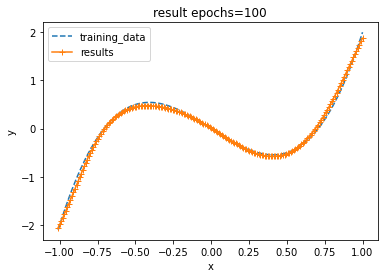

In [239]:
# 結果グラフ出力
plt.title('result epochs=' + str(epochs))
plt.plot(input_data, training_data, linestyle="dashed", label="training_data")
plt.plot(input_data, results, marker="+", label="results")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('images/result-epochs_' + str(epochs) +'-num_hidden_' + str(num_hidden) + '.png')
plt.legend(loc = 'best')
plt.show
